In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file = pd.read_csv('cereal.csv')
cereals = pd.DataFrame(file)
cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70.0,4,1,130,10.0,5.0,6.0,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120.0,3,5,15,2.0,8.0,8.0,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70.0,4,1,260,9.0,7.0,5.0,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50.0,4,0,140,14.0,8.0,0.0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110.0,2,2,200,1.0,14.0,8.0,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2,1,250,0.0,21.0,3.0,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110.0,1,1,140,0.0,13.0,12.0,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100.0,3,1,230,3.0,17.0,3.0,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100.0,3,1,200,3.0,17.0,3.0,110,25,1,1.0,1.00,51.592193


# Which manufacturers produce cereals with a calorie count above 120?

In [214]:
high_calories = cereals[cereals['calories'] > 120]
mfr_calories = high_calories['mfr'].value_counts()

for mfr, count in mfr_calories.items():
    print(f"Manufacturer {mfr} has {count} cereals with a calorie content above 120.")

Manufacturer G has 3 cereals with a calorie content above 120.
Manufacturer K has 3 cereals with a calorie content above 120.
Manufacturer R has 2 cereals with a calorie content above 120.


# What is the correlation between higher calories and the sugar and fat content?

In [215]:
calorie_vs_sugars_fats = ['name', 'mfr', 'calories', 'sugars', 'fat']
grouped_by = cereals[calorie_vs_sugars_fats]
sort_by_calories = grouped_by.sort_values(by='calories', ascending=False).iloc[0:15]
sort_by_calories.index = range(1, len(sort_by_calories) + 1)
#This generates a range of integers starting from 1 upto the length of my results
# The 'len(sort_by_calories)' returns the number of rows in the DataFrame and 
# by adding 1 to stop the value of the range, we ensure that the range includes the upper bound
sort_by_calories


,name,mfr,calories,sugars,fat
1,Mueslix Crispy Blend,K,160.0,13.0,2
2,Muesli Raisins; Dates; & Almonds,R,150.0,11.0,3
3,Muesli Raisins; Peaches; & Pecans,R,150.0,11.0,3
4,Just Right Fruit & Nut,K,140.0,9.0,1
5,Total Raisin Bran,G,140.0,14.0,1
6,Nutri-Grain Almond-Raisin,K,140.0,7.0,2
7,Basic 4,G,130.0,8.0,2
8,Oatmeal Raisin Crisp,G,130.0,10.0,2
9,Great Grains Pecan,P,120.0,4.0,3
10,Cap'n'Crunch,Q,120.0,12.0,2


In [216]:
print(cereals['fat'].mean())
print(cereals['sugars'].mean())

1.0129870129870129
6.638888888888889


The cereals in this list are the top 15 with the highest calories. The data indicates that the cereals with higher calories are like to have an increased amount of sugars and fats.

To visualise this please see the scatter graph below.

The correlation between calories and fat is: 0.5047662950591815
The correlation between calories and sugar is: 0.574725353264752


Text(0.5, 1.0, 'Calories vs Fat and Sugar')

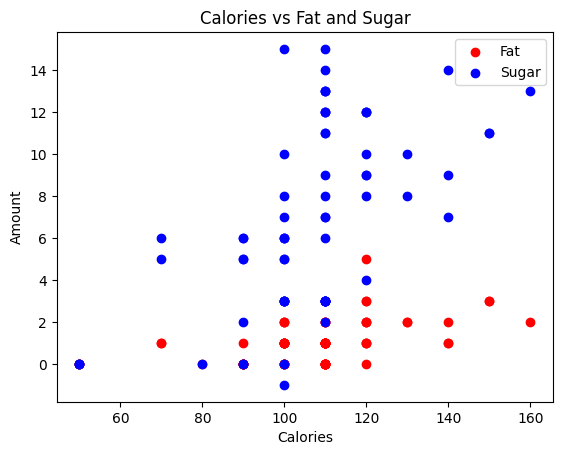

In [217]:
calorie_fat_correlation = cereals['calories'].corr(cereals['fat'])
print(f"The correlation between calories and fat is: {calorie_fat_correlation}")
calorie_sugar_correlation = cereals['calories'].corr(cereals['sugars'])
print(f"The correlation between calories and sugar is: {calorie_sugar_correlation}")

plt.scatter(cereals['calories'], cereals['fat'], c='red', label='Fat')
plt.scatter(cereals['calories'], cereals['sugars'], c='blue', label='Sugar')
plt.xlabel('Calories')
plt.ylabel('Amount')
plt.legend() 
plt.title('Calories vs Fat and Sugar')


# Index the data set by Manufacturer.

In [218]:
cereals.set_index('mfr', inplace=True)
cereals

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,,,
N,100% Bran,C,70.0,4,1,130,10.0,5.0,6.0,280,25,3,1.0,0.33,68.402973
Q,100% Natural Bran,C,120.0,3,5,15,2.0,8.0,8.0,135,0,3,1.0,1.00,33.983679
K,All-Bran,C,70.0,4,1,260,9.0,7.0,5.0,320,25,3,1.0,0.33,59.425505
K,All-Bran with Extra Fiber,C,50.0,4,0,140,14.0,8.0,0.0,330,25,3,1.0,0.50,93.704912
R,Almond Delight,C,110.0,2,2,200,1.0,14.0,8.0,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G,Triples,C,110.0,2,1,250,0.0,21.0,3.0,60,25,3,1.0,0.75,39.106174
G,Trix,C,110.0,1,1,140,0.0,13.0,12.0,25,25,2,1.0,1.00,27.753301
R,Wheat Chex,C,100.0,3,1,230,3.0,17.0,3.0,115,25,1,1.0,0.67,49.787445


# Index the data set by Sodium content.

In [219]:
cereals.set_index('sodium', inplace=True)


In [220]:
cereals.sort_values(by='sodium', ascending=False)

,name,type,calories,protein,fat,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
sodium,,,,,,,,,,,,,,
320,Product 19,C,100.0,3,0,1.0,20.0,3.0,45,100,3,1.0,1.00,41.503540
290,Rice Krispies,C,110.0,2,0,0.0,22.0,3.0,35,25,1,1.0,1.00,40.560159
290,Cheerios,C,NaN,6,2,2.0,17.0,1.0,105,25,1,1.0,1.25,50.764999
290,Corn Flakes,C,NaN,2,0,1.0,21.0,2.0,35,25,1,1.0,1.00,45.863324
280,Corn Chex,C,110.0,2,0,0.0,22.0,3.0,25,25,1,1.0,1.00,41.445019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Frosted Mini-Wheats,C,100.0,3,0,3.0,14.0,7.0,100,25,2,1.0,0.80,58.345141
0,Raisin Squares,C,90.0,2,0,2.0,15.0,6.0,110,25,3,1.0,0.50,55.333142
0,Maypo,H,100.0,4,1,0.0,16.0,3.0,95,25,2,1.0,1.00,54.850917


I've noticed that indexing by sodium content AFTER indexing by manufacturer, the new index replaces the old one, however this seems to remove the 'mfr' column from my second table.